In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime

data = pd.read_csv('complete.txt', sep=",", header=None)
data.columns = ["Name", "Date", "Time"]

# Time is irrelevant
del data["Time"]

### Main DataFrame ###

data = data.drop_duplicates().sort_values("Name")
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values("Date").drop_duplicates()

In [2]:
#Get a dataframe with names and dates and for the days present marked as 1, if absent 0
data2 = data.assign(Present = 1)
new = data2.pivot('Name','Date','Present')
new[np.isnan(new)] = 0
new2 = new.T

new2.head()



Name,Adriene Wilde,Andreas Jost,Angela Compos,Anisha Mathes,Annie Lapham,Augusta Beltrami,Aurea Durrance,Bebe Riva,Bridgette Marko,Byron Caroll,...,Remedios Fincham,Sal Papa,Stephine Gatlin,Tasia Dube,Tora Echevarria,Vance Ates,Velvet Matley,Veronique Blakemore,Vonk Billips,Zofia Roll
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-02,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2012-01-03,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2012-01-04,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2012-01-05,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


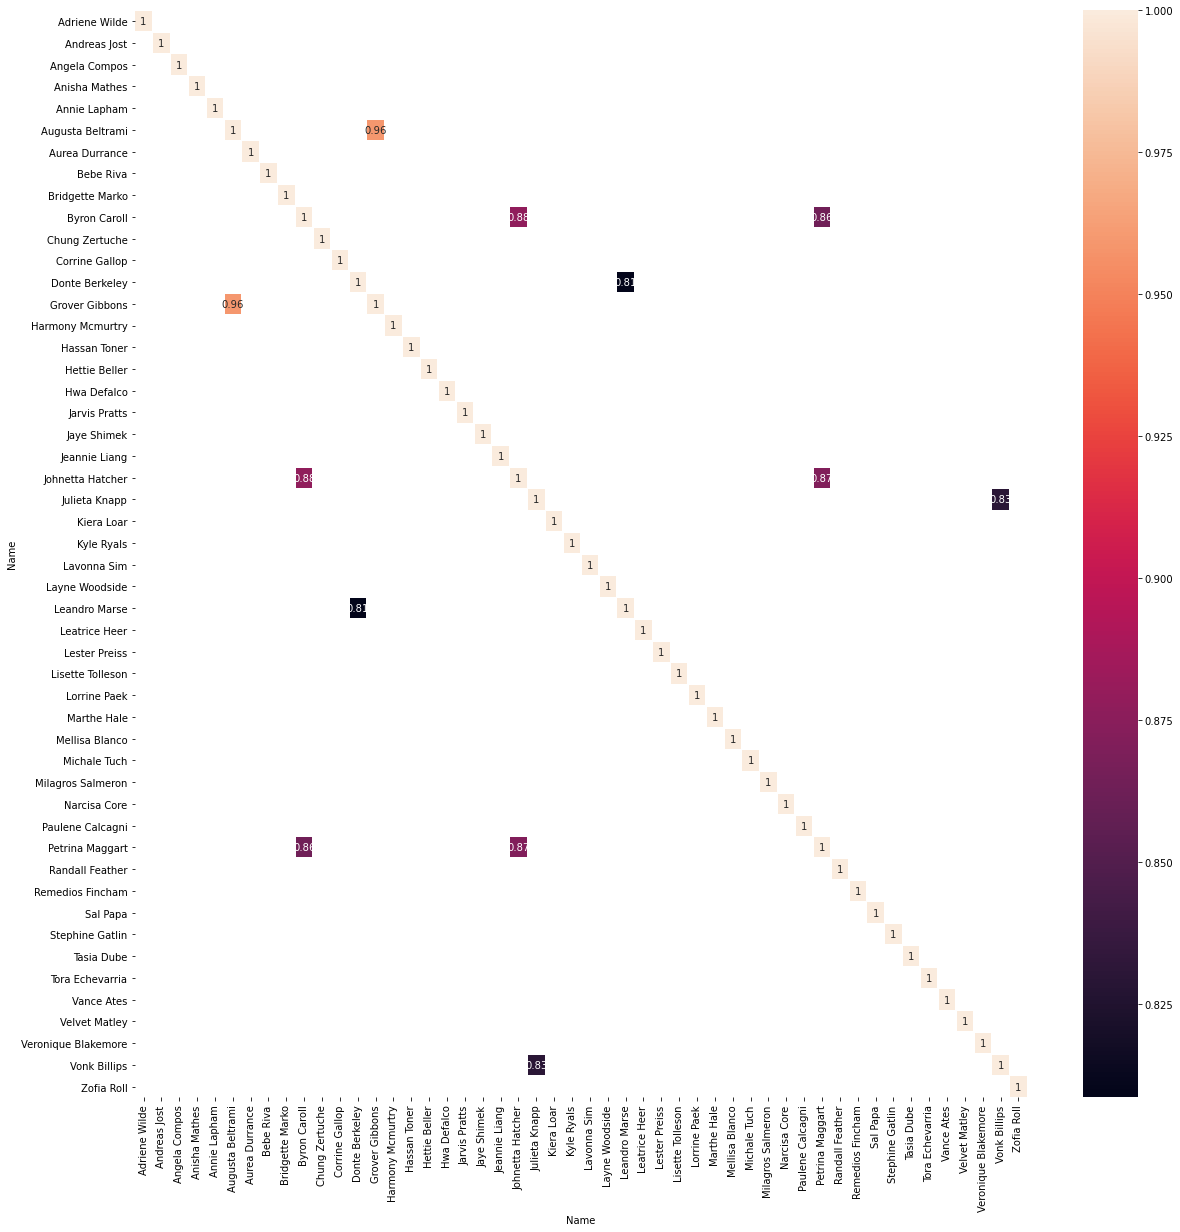

In [4]:
#Creating a correlation and generating heatmap
c = new2.corr()
#subset for correlation value greater than 0.8
c2 = c[c > 0.8]

import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(c2, annot=True, linewidths=.5, ax=ax)
plt.savefig('heatmap.png')